<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Manipulating-a-Dataframe" data-toc-modified-id="Manipulating-a-Dataframe-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Manipulating a Dataframe</a></span></li><li><span><a href="#Column-Operations" data-toc-modified-id="Column-Operations-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Column Operations</a></span><ul class="toc-item"><li><span><a href="#File-Read-direct-from-Web-Request" data-toc-modified-id="File-Read-direct-from-Web-Request-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>File Read direct from Web Request</a></span></li><li><span><a href="#Column-Encoding" data-toc-modified-id="Column-Encoding-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Column Encoding</a></span></li><li><span><a href="#Column-Translation" data-toc-modified-id="Column-Translation-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Column Translation</a></span></li><li><span><a href="#Drop-Column" data-toc-modified-id="Drop-Column-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Drop Column</a></span></li></ul></li><li><span><a href="#Data-Types" data-toc-modified-id="Data-Types-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Types</a></span><ul class="toc-item"><li><span><a href="#Changing-Data-Types" data-toc-modified-id="Changing-Data-Types-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Changing Data Types</a></span></li></ul></li><li><span><a href="#Applying-Functions" data-toc-modified-id="Applying-Functions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Applying Functions</a></span></li><li><span><a href="#Grouping" data-toc-modified-id="Grouping-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Grouping</a></span><ul class="toc-item"><li><span><a href="#Group-by-Multiple-Fields" data-toc-modified-id="Group-by-Multiple-Fields-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Group by Multiple Fields</a></span></li></ul></li></ul></div>

# 5.2 Pandas Operations

## Manipulating a Dataframe
- Common ETL task
- Done because all data is dirty
- Common base processing
   - Calculate columns values
   - Translate columns
   - Remove columns

## Column Operations

In [15]:
import io
import pandas as pd
import requests as r

#variables needed for ease of file access
url = 'http://drd.ba.ttu.edu/isqs6339/ex/L2.1/'
file_1 = 'test_data.csv'
file_2 = 'test_data_bad.csv'

### File Read direct from Web Request 

In [3]:
res = r.get(url + file_1)
res.status_code
df = pd.read_csv(io.StringIO(res.text))  
df

,RecordId,Continuous,Nominal,Ordinal_7pt,Ordinal_5pt
0,1,41.805702,Green,7,5
1,2,77.210218,Green,3,2
2,3,23.171868,Blue,7,1
3,4,14.442841,Violet,4,5
4,5,3.494745,Blue,5,1
5,6,76.314918,Yellow,1,5
6,7,35.584444,Blue,3,1
7,8,73.576334,Green,7,5
8,9,84.563229,Orange,3,5
9,10,92.856276,Indigo,5,4


### Column Encoding

Add a column with all values equal to 100:
- Pandas adds a column whenever you reference it

In [4]:
df['100_col'] = 100

Reference this new column to create another column
- Notice new columns

In [6]:
df['likert_100'] = 100/df['Ordinal_7pt']
df

,RecordId,Continuous,Nominal,Ordinal_7pt,Ordinal_5pt,100_col,likert_100
0,1,41.805702,Green,7,5,100,14.285714
1,2,77.210218,Green,3,2,100,33.333333
2,3,23.171868,Blue,7,1,100,14.285714
3,4,14.442841,Violet,4,5,100,25.000000
4,5,3.494745,Blue,5,1,100,20.000000
5,6,76.314918,Yellow,1,5,100,100.000000
6,7,35.584444,Blue,3,1,100,33.333333
7,8,73.576334,Green,7,5,100,14.285714
8,9,84.563229,Orange,3,5,100,33.333333
9,10,92.856276,Indigo,5,4,100,20.000000


How to not iterate in Pandas
- `df.iterrows` should not be used to update columns

In [7]:
# Doesn't work intentionally 
for index, row in df.iterrows():
    row['iterval'] = row['Ordinal_7pt'] + row['Ordinal_5pt']
df

,RecordId,Continuous,Nominal,Ordinal_7pt,Ordinal_5pt,100_col,likert_100
0,1,41.805702,Green,7,5,100,14.285714
1,2,77.210218,Green,3,2,100,33.333333
2,3,23.171868,Blue,7,1,100,14.285714
3,4,14.442841,Violet,4,5,100,25.000000
4,5,3.494745,Blue,5,1,100,20.000000
5,6,76.314918,Yellow,1,5,100,100.000000
6,7,35.584444,Blue,3,1,100,33.333333
7,8,73.576334,Green,7,5,100,14.285714
8,9,84.563229,Orange,3,5,100,33.333333
9,10,92.856276,Indigo,5,4,100,20.000000


### Column Translation 

Dumping data into 'buckets'
- Here we mark everything above 4 as high, the remainder as low
- This method isn't best practice, a little brute force-y

In [9]:
# set default value
df['7highlow'] = 'low'

# set the other value
df['7highlow'][df['Ordinal_7pt'] > 4] = 'high'

df

/Users/jdmini/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,RecordId,Continuous,Nominal,Ordinal_7pt,Ordinal_5pt,100_col,likert_100,7highlow
0,1,41.805702,Green,7,5,100,14.285714,high
1,2,77.210218,Green,3,2,100,33.333333,low
2,3,23.171868,Blue,7,1,100,14.285714,high
3,4,14.442841,Violet,4,5,100,25.000000,low
4,5,3.494745,Blue,5,1,100,20.000000,high
5,6,76.314918,Yellow,1,5,100,100.000000,low
6,7,35.584444,Blue,3,1,100,33.333333,low
7,8,73.576334,Green,7,5,100,14.285714,high
8,9,84.563229,Orange,3,5,100,33.333333,low
9,10,92.856276,Indigo,5,4,100,20.000000,high


### Drop Column
- `df.columns` shows us current columns
- `df.drop` drops columns
    - `axis` parameter specifies column
- Axes in Pandas
    - Axis = 1 specifies column
    - Axis = 2 specifes row
- Note that we actually created a new dataframe 'df1' and copied in our new dataframe with the columns dropped
    - To avoid this, we can add parameter `inplace=True`

In [10]:
df.columns
df1 = df.drop('7highlow', axis=1) #axis specifies column
df1
# Note, this created a new copy of dataframe: 'df1'

# Instead of copying we can do the following:
df
df.drop('7highlow', axis=1, inplace=True)
df

,RecordId,Continuous,Nominal,Ordinal_7pt,Ordinal_5pt,100_col,likert_100
0,1,41.805702,Green,7,5,100,14.285714
1,2,77.210218,Green,3,2,100,33.333333
2,3,23.171868,Blue,7,1,100,14.285714
3,4,14.442841,Violet,4,5,100,25.000000
4,5,3.494745,Blue,5,1,100,20.000000
5,6,76.314918,Yellow,1,5,100,100.000000
6,7,35.584444,Blue,3,1,100,33.333333
7,8,73.576334,Green,7,5,100,14.285714
8,9,84.563229,Orange,3,5,100,33.333333
9,10,92.856276,Indigo,5,4,100,20.000000


## Data Types
- Data types determine what actions can be done
    - E.g.: concatenation vs arithmetic
- Pandas tries to guess your data type
    - Also differs from Python data types
    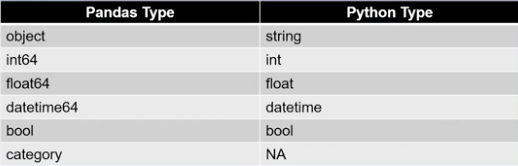
    - 'category' type is for categorical data and not present in Python

Setup for "bad data" example
- Create variables
- Read from web request

In [16]:
res = r.get(url + file_2)
res.status_code
df = pd.read_csv(io.StringIO(res.text))  
df

,RecordId,Continuous,Nominal,Ordinal_7pt,Ordinal_5pt
0,1,41.805702,Green,7,a
1,2,77.210218,Green,3,2
2,3,23.171868,Blue,7,1
3,4,14.442841,Violet,4,5
4,5,3.494745,Blue,5,1
5,6,76.314918,Yellow,1,5
6,7,35.584444,Blue,3,1
7,8,73.576334,Green,7,5
8,9,84.563229,Orange,3,5
9,10,92.856276,Indigo,5,4


Notice missing fields:

In [17]:
df.describe()
df.dtypes

RecordId         int64
Continuous     float64
Nominal         object
Ordinal_7pt     object
Ordinal_5pt     object
dtype: object

Examine the bad read:

In [19]:
res = r.get(url + file_2)
res.status_code
df = pd.read_csv(io.StringIO(res.text))  

Notice numbers are coming up as objects(strings)
- Pandas will treat an entire column as object datatype if it runs into non-numeric data

In [ ]:
df.dtypes

Get counts of values in the columns with object datatypes
- We can see one letter appearing in each of these columns

In [20]:
df['Ordinal_7pt'].value_counts()
df['Ordinal_5pt'].value_counts()

1    15
4    11
5    10
2     9
3     4
a     1
Name: Ordinal_5pt, dtype: int64

For now, we will just drop the row
- Not the ideal way to clean data, but just an example
- Find the indexes of the bad data rows and dropw them
- We are deleting rows here, so axis = 0

In [22]:
df.drop(0, axis=0, inplace=True)
df.drop(49, axis=0, inplace=True)
df

,RecordId,Continuous,Nominal,Ordinal_7pt,Ordinal_5pt
1,2,77.210218,Green,3,2
2,3,23.171868,Blue,7,1
3,4,14.442841,Violet,4,5
4,5,3.494745,Blue,5,1
5,6,76.314918,Yellow,1,5
6,7,35.584444,Blue,3,1
7,8,73.576334,Green,7,5
8,9,84.563229,Orange,3,5
9,10,92.856276,Indigo,5,4
10,11,67.363326,Violet,4,1


How did we drop the last row after removing the first?
- Typically the index should have shifted and position 49 should have become 48
- Pandas does not shift indexes when you remove them
- If we remove index 7, it would skip from 6 to 8
- May want to reindex after drop operations
- `df.reset_index(drop=True, inplace=True)
    - Resets the index

In [23]:
df.reset_index(drop=True, inplace=True)
df

,RecordId,Continuous,Nominal,Ordinal_7pt,Ordinal_5pt
0,2,77.210218,Green,3,2
1,3,23.171868,Blue,7,1
2,4,14.442841,Violet,4,5
3,5,3.494745,Blue,5,1
4,6,76.314918,Yellow,1,5
5,7,35.584444,Blue,3,1
6,8,73.576334,Green,7,5
7,9,84.563229,Orange,3,5
8,10,92.856276,Indigo,5,4
9,11,67.363326,Violet,4,1


### Changing Data Types

In [ ]:
df.dtypes

The values are now correct, but the datatype is still wrong
- `pd.to_numeric(df['variable'])
    - Converts value to numeric datatype
    - Pass in the necessary columns from the df 

In [24]:
df['Ordinal_7pt'] = pd.to_numeric(df['Ordinal_7pt'])
df['Ordinal_5pt'] = pd.to_numeric(df['Ordinal_5pt'])

Check types and describe!

In [25]:
#Types look good
df.dtypes
df.describe()

,RecordId,Continuous,Ordinal_7pt,Ordinal_5pt
count,48.00,48.000000,48.000000,48.000000
mean,25.50,52.093181,4.375000,2.812500
std,14.00,28.198455,1.770022,1.579877
min,2.00,3.370450,1.000000,1.000000
25%,13.75,30.449949,3.000000,1.000000
50%,25.50,56.968931,4.000000,2.500000
75%,37.25,76.538743,6.000000,4.000000
max,49.00,100.753330,7.000000,5.000000


## Applying Functions
- Pandas supports an Apply function
    - Allows a function to 'apply' all items on an axis
- Same function works for rows and columns

Setup:

In [26]:
url = 'http://drd.ba.ttu.edu/isqs6339/ex/L2.1/'
file_1 = 'test_data.csv'

res = r.get(url + file_1)
res.status_code
df = pd.read_csv(io.StringIO(res.text)) 

Recall from earlier that this doesn't work:

In [ ]:
#Intentionally broken
for index, row in df.iterrows():
    row['iterval'] = row['Ordinal_7pt'] + row['Ordinal_5pt'] + index

Define a function to sum two columns in row

In [27]:
def ComputeVals(row):
    return row['Ordinal_7pt'] + row['Ordinal_5pt']

`df.apply(functionname,axis)`
- Use apply function to apply our function to axis 1 (rows)

In [28]:
df['encoded_likert'] = df.apply(ComputeVals, axis=1)
df

,RecordId,Continuous,Nominal,Ordinal_7pt,Ordinal_5pt,encoded_likert
0,1,41.805702,Green,7,5,12
1,2,77.210218,Green,3,2,5
2,3,23.171868,Blue,7,1,8
3,4,14.442841,Violet,4,5,9
4,5,3.494745,Blue,5,1,6
5,6,76.314918,Yellow,1,5,6
6,7,35.584444,Blue,3,1,4
7,8,73.576334,Green,7,5,12
8,9,84.563229,Orange,3,5,8
9,10,92.856276,Indigo,5,4,9


## Grouping

`df.groupby('variable')`
- Use to group data
- Here we group values in the nominal column and return the means

In [29]:
df.groupby('Nominal').mean()

,RecordId,Continuous,Ordinal_7pt,Ordinal_5pt,encoded_likert
Nominal,,,,,
Blue,21.500000,41.470501,4.083333,2.000000,6.083333
Green,25.700000,58.984495,5.300000,3.000000,8.300000
Indigo,32.750000,61.158636,5.125000,3.500000,8.625000
Orange,23.600000,50.995312,4.600000,2.400000,7.000000
Red,27.285714,63.441620,3.857143,2.571429,6.428571
Violet,23.800000,27.896101,4.200000,4.000000,8.200000
Yellow,23.333333,65.415074,2.333333,4.000000,6.333333


### Group by Multiple Fields
- Create our high/low column from previous lesson
- Pass both columns into `df.groupby` as a dictionary (use brackets) and get the means

In [30]:
df['7highlow'] = 'low'
#set the other value
df['7highlow'][df['Ordinal_7pt'] > 4] = 'high'

df.groupby(['Nominal', '7highlow']).mean()

/Users/jdmini/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


RecordId  Continuous  Ordinal_7pt  Ordinal_5pt  \
Nominal 7highlow                                                    
Blue    high      10.600000   27.428431     5.600000     2.000000   
        low       29.285714   51.500551     3.000000     2.000000   
Green   high      27.142857   63.668165     6.571429     3.285714   
        low       22.333333   48.055930     2.333333     2.333333   
Indigo  high      29.800000   55.532045     6.000000     4.000000   
        low       37.666667   70.536287     3.666667     2.666667   
Orange  high      31.000000   54.991894     5.666667     2.000000   
        low       12.500000   45.000441     3.000000     3.000000   
Red     high      34.666667   40.613895     5.666667     2.333333   
        low       21.750000   80.562413     2.500000     2.750000   
Violet  high      42.000000    3.370450     6.000000     5.000000   
        low       19.250000   34.027513     3.750000     3.750000   
Yellow  low       23.333333   65.415074     2.333333     4.000000   

                  encoded_likert  
Nominal 7highlow                  
Blue    high            7.600000  
        low             5.000000  
Green   high            9.857143  
        low             4.666667  
Indigo  high           10.000000  
        low             6.333333  
Orange  high            7.666667  
        low             6.000000  
Red     high            8.000000  
        low             5.250000  
Violet  high           11.000000  
        low             7.500000  
Yellow  low             6.333333